# Exploratory Data Analysisi (Netflix Movies & TvShows)

#### in this notebook , we are going to prepare,clean,visualize this dataset and try to ask some questions and to answer them 

### before begining , let's answer some questions : 

1. which years have the most ranked movies & Tv shows ?
2. What is the average number of minutes a movie contains ?
3. What is the average number of episodes a TvShow contains ?
4. Which countries have published most films and TV shows ?
5. What are the most commonly used languages in TV shows and movies?
6. Which genres have the best ratings


## getting know the dataset

uploading the needed library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/HP PAVIL/Desktop/python/Real_Life_Projects/netflix project/netflix_list.csv')
df.head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


get the columns that our dataset contains : 

In [3]:
df.columns

Index(['imdb_id', 'title', 'popular_rank', 'certificate', 'startYear',
       'endYear', 'episodes', 'runtime', 'type', 'orign_country', 'language',
       'plot', 'summary', 'rating', 'numVotes', 'genres', 'isAdult', 'cast',
       'image_url'],
      dtype='object')

**Know the size :**

In [4]:
df.shape

(7008, 19)

we have 7008 movies and tv shows 

**know the data type for each column**


In [5]:
df.dtypes

imdb_id           object
title             object
popular_rank      object
certificate       object
startYear        float64
endYear          float64
episodes         float64
runtime           object
type              object
orign_country     object
language          object
plot              object
summary           object
rating           float64
numVotes         float64
genres            object
isAdult            int64
cast              object
image_url         object
dtype: object

**know general information about the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   endYear        1126 non-null   float64
 6   episodes       2304 non-null   float64
 7   runtime        7006 non-null   object 
 8   type           7006 non-null   object 
 9   orign_country  7008 non-null   object 
 10  language       6995 non-null   object 
 11  plot           6609 non-null   object 
 12  summary        7008 non-null   object 
 13  rating         6000 non-null   float64
 14  numVotes       6000 non-null   float64
 15  genres         7006 non-null   object 
 16  isAdult        7008 non-null   int64  
 17  cast           7008 non-null   object 
 18  image_ur

In [7]:
df.describe()

,startYear,endYear,episodes,rating,numVotes,isAdult
count,6493.000000,1126.000000,2304.000000,6000.000000,6.000000e+03,7008.0
mean,2015.606653,2016.613677,38.510851,6.696400,1.961778e+04,0.0
std,7.855886,5.195806,237.894838,1.209824,7.975237e+04,0.0
min,1932.000000,1969.000000,1.000000,1.700000,5.000000e+00,0.0
25%,2015.000000,2016.000000,8.000000,6.000000,3.040000e+02,0.0
50%,2017.000000,2018.000000,14.000000,6.800000,1.312000e+03,0.0
75%,2019.000000,2019.000000,30.000000,7.600000,6.166750e+03,0.0
max,2022.000000,2022.000000,8358.000000,9.700000,1.697849e+06,0.0


## Data Preparation & Cleaning 

let's see first if there is any duplicated rows , and try to drop them

In [8]:
df[df.duplicated()]

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url


**as you can see there is no duplicated rows in our dataset**

#### let's see if there is any missing values and plot it

In [9]:
missing_values  = df.isnull().sum()

<Axes: title={'center': 'the number of missing values for each column'}, xlabel='number of missing values', ylabel='column names'>

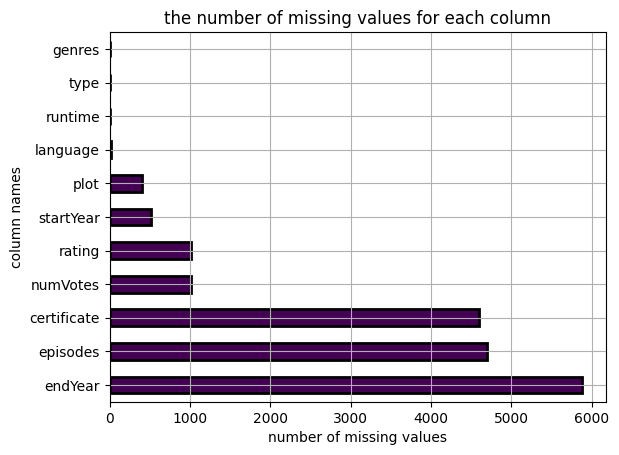

In [10]:
#sort the missing values from the highest one
missing_values = missing_values.sort_values(ascending=False)
#delete columns who haven't null values
missing_values = missing_values[missing_values != missing_values.isnull()]
#plot the columns who have missing values 
missing_values.plot(kind='barh',colormap='viridis',grid=True,edgecolor='black',linewidth=2,xlabel='number of missing values',ylabel='column names',title='the number of missing values for each column')

### dealing with missing data

1. endYear : if it is a film ,I'll fill the endYear column with the StartYear because probably it is the same . if it is a TvShow I'll replace the null value with 'still showing' 
2. episodes : I'll replace it with "No Data"
3. certificates :  I'll replace it with "No Certificate"
4. num_votes & rating  :  I'll replace it with "No rate"
5. StartYear :  I'll replace it with "Unknown"
6. plot : I'll replace it with "No Data"
7. languages : I'll replace it with "Unknown"
8. genres : I'll replace it with "No Genre"
9. type : I'll replace it with "No Type"
10. runtime : I'll replace it with "Unknown"

In [11]:
df['startYear'] = df['startYear'].fillna('Unknown')
df['episodes'] = df['episodes'].fillna('No Data')
df['certificate'] = df['certificate'].fillna('No certificate')
df['numVotes'] = df['numVotes'].fillna('No rate')
df['rating'] = df['rating'].fillna('No rate')
df['plot'] = df['certificate'].fillna('No Data')
df['language'] = df['language'].fillna('Unknown')
df['genres'] = df['genres'].fillna('No Genre')
df['type'] = df['type'].fillna('No Type')
df['runtime'] = df['runtime'].fillna('Unknown')

#### fill the end year column
#### first let's see the values do the endyear column contains

In [12]:
df.type.value_counts()

type
movie           2923
tvSeries        2199
tvEpisode        785
tvSpecial        391
tvMiniSeries     318
tvMovie          161
short            112
video            110
tvShort            6
No Type            2
videoGame          1
Name: count, dtype: int64

In [13]:
#fill the endyear in case of a (Series)
df.loc[(df['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries'])), 'endYear'] = df['endYear'].fillna('Still Showing')
#fill the endyear in case of a (film)
df.loc[(df['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShort'])), 'endYear'] = df['endYear'].fillna(df['startYear'])


In [14]:
#check again the missing values 
missing_values  = df.isnull().sum()
missing_values


imdb_id          0
title            0
popular_rank     0
certificate      0
startYear        0
endYear          2
episodes         0
runtime          0
type             0
orign_country    0
language         0
plot             0
summary          0
rating           0
numVotes         0
genres           0
isAdult          0
cast             0
image_url        0
dtype: int64

In [15]:
df[df.endYear.isnull()]

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
6624,tt14821886,The War Next-Door,"9,751",No certificate,Unknown,NaN,No Data,Unknown,No Type,Mexico,Spanish,No certificate,-,No rate,No rate,No Genre,0,"['Vanessa Bauche', 'Ana Layevska', 'Marco León...",https://m.media-amazon.com/images/G/01/imdb/im...
6625,tt14825954,Exception,"9,752",No certificate,Unknown,NaN,No Data,Unknown,No Type,-,-,No certificate,-,No rate,No rate,No Genre,0,-,https://m.media-amazon.com/images/M/MV5BMGI0Mz...


we face a problem here : 
the rows who have no type still can't change the endYear column of them 

the solution that I suggest here is :  fill those two rows with 'Unknown' value

In [16]:
df.loc[(df['type'] == 'No Type'), 'endYear'] = df['endYear'].fillna('Unknown')
#check again the missing values 
missing_values  = df.isnull().sum()
missing_values


imdb_id          0
title            0
popular_rank     0
certificate      0
startYear        0
endYear          0
episodes         0
runtime          0
type             0
orign_country    0
language         0
plot             0
summary          0
rating           0
numVotes         0
genres           0
isAdult          0
cast             0
image_url        0
dtype: int64

### Finally : No missing Values 

## Data exploratory and visualisation 

first let's see the movies & Series distribution

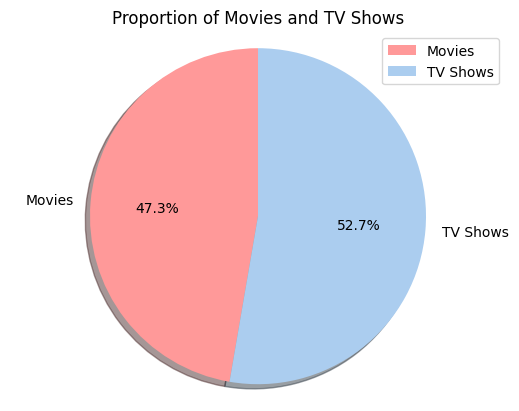

In [17]:
# Calculate the sizes
movies = df.loc[df['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShort'])].shape[0]
tv_shows = df.loc[df['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries'])].shape[0]

# Define the labels and colors
labels = ['Movies', 'TV Shows']
sizes = [movies, tv_shows]
colors = ['#ff9999', '#abcdef']  # Custom colors for the pie slices

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

# Customize the chart appearance
plt.title('Proportion of Movies and TV Shows')
plt.axis('equal')  # Ensure the pie chart is circular

# Add a legend
plt.legend(loc='upper right')

# Show the chart
plt.show()


this dataset contains tv shows more than movies 

-----------------------------------------------------------------------------------------------------------------------------------------------

### column to be analysed is : orign_country

### what are the countries who distributed more films & Movies ?

In [18]:
df.orign_country.value_counts()


orign_country
United States     2836
-                  551
United Kingdom     508
Japan              406
South Korea        316
                  ... 
Cyprus               1
Bahamas              1
Croatia              1
Puerto Rico          1
Haiti                1
Name: count, Length: 82, dtype: int64

we face a problem : there is more than 500 (films & TvShows) origin country with this values--> "-"

we try to delete those columns 

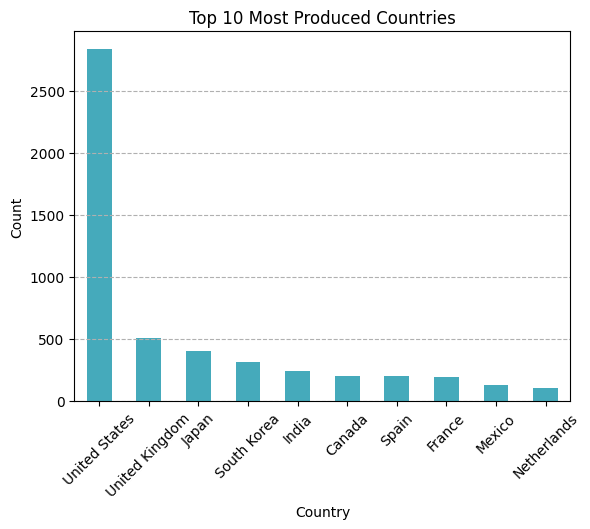

<Figure size 800x480 with 0 Axes>

In [19]:
# Filter the DataFrame to exclude rows with "-"
filtered_df = df[df['orign_country'] != "-"]

# Calculate the most discovered countries
most_dis_country = filtered_df['orign_country'].value_counts().head(10)

# Create the bar chart plot
most_dis_country.plot(kind='bar', color='#45aabb')

# Customize the plot appearance
plt.title('Top 10 Most Produced Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Adjust the figure size and resolution
plt.figure(figsize=(10, 6), dpi=80)

# Show the plot
plt.show()


#### America stands out as one of the top countries for exporting films and series.

----------------------------------------------------------------------------------------------------------------------------------------------------------

### next column to be analysed is : Start Year

#### let's get to know the years when Netflix distribute more films & TvShows

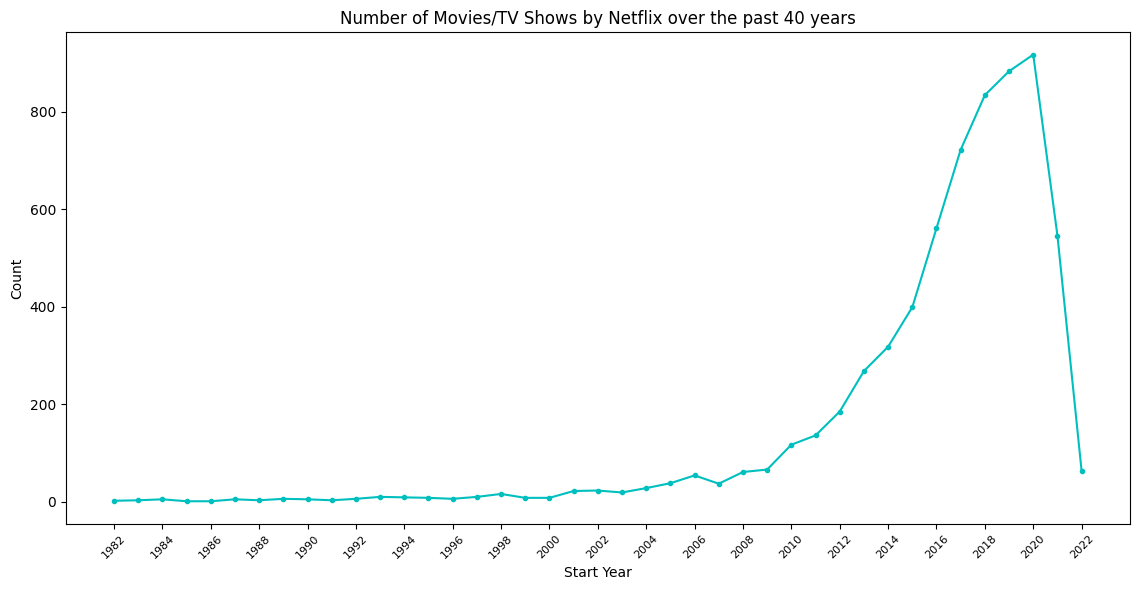

In [20]:
#group the dataframe by start year ,and count how many rows we have for each year
df_StartYear = df.groupby('startYear')['imdb_id'].count()#we can choose any columns instead of imdb_id column
# remove the rows where the start year is UNKNOWN  
df_StartYear = df_StartYear[df_StartYear.index != 'Unknown']
#sort from the first year to last year
df_StartYear = df_StartYear.sort_index()
years = df_StartYear.index.to_list()

# Create the figure and set the figure size
plt.figure(figsize=(11.5, 6))

# Plot the data
plt.plot(df_StartYear[36:],'c-',marker='.')

# Customize the plot
plt.title('Number of Movies/TV Shows by Netflix over the past 40 years')
plt.xlabel('Start Year')
plt.ylabel('Count')

# Adjust x-axis tick spacing
plt.xticks( years[36::2], rotation=45, fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

from the Chart above :
1. Netflix took many years to become famous and to produce many films/TV shows
2. Netflix's real start is after 2014
3. Netflix's peak production of films/TV shows was in 2019 and after the beginning of 2020 the figure began to decline, obviously due to the effects of the coronavirus

-----------------------------------------------------------------------------------------------------------------------------------------------

### next column to be analysed is : runtime

#### let's see for each last ten years , what is the average of minutes has Netflix produced for films and for Tv-Shows

I faced a small problem : which is there is many rows with this value ->"\N" in runtime column  

In [21]:
df.runtime[(df.startYear == 2022) & (df.type != 'movie')].head(20)


1199    \N
1214    \N
1627    \N
3023    \N
3086    \N
3248    \N
3837    \N
3849    \N
4133    \N
4377    \N
4520    \N
4721    22
5063    \N
5081    \N
5255    \N
5357    \N
5490    \N
5575    \N
5664    \N
5756     7
Name: runtime, dtype: object

as we can see there is a lot of series that introduces in 2021 & 2022 with no runtime (obviously because they're still showing )

we replace the "\N value with NaN  and try to make our graph

In [22]:
import numpy as np
# Replace '\\N' with NaN
df.runtime.replace('\\N', np.nan, inplace=True)


And Now :  We have a Clean Column 
mext steps before plotting the chart is : 
1. delete the unknown runtime rows
2. convert the column as a float  

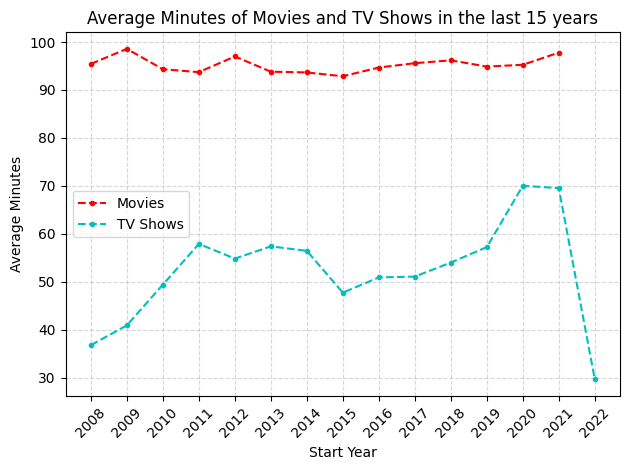

In [23]:

# Remove the unknown runtime rows (we have just 2 rows; we can easily remove them without any change for our graph) 
# +(Store movies and TV shows in a separate variable)
movies = df.loc[(df['runtime'] != 'Unknown') & (df['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShort']))]
tv_shows = df.loc[(df['runtime'] != 'Unknown') & (df['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries']))]

# Convert the runtime column to float type using .loc
movies.loc[:, 'runtime'] = movies['runtime'].astype(float)
tv_shows.loc[:, 'runtime'] = tv_shows['runtime'].astype(float)

# Group the dataframe by start year and show the runtime for each year
movie_runtimeYear = movies.groupby('startYear')[['runtime']].mean()
tv_shows_runtimeYear = tv_shows.groupby('startYear')[['runtime']].mean()

# Remove the rows where there is no start year
movie_runtimeYear = movie_runtimeYear[movie_runtimeYear.index != 'Unknown']
tv_shows_runtimeYear = tv_shows_runtimeYear[tv_shows_runtimeYear.index != 'Unknown']

# Display just the last 15 years
last_fifteen_rows_movies = movie_runtimeYear.iloc[-15:]
last_fifteen_rows_tv_shows = tv_shows_runtimeYear.iloc[-15:]

# Plotting the data
plt.plot(last_fifteen_rows_movies, 'r--',marker=".", label='Movies')
plt.plot(last_fifteen_rows_tv_shows, 'c--',marker=".", label='TV Shows')

# Adding labels and title
plt.xlabel('Start Year')
plt.ylabel('Average Minutes')
plt.title('Average Minutes of Movies and TV Shows in the last 15 years')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Customizing tick labels
plt.xticks(last_fifteen_rows_movies.index.to_list(), rotation=45)

# Adding legend
plt.legend()
plt.tight_layout()
# Display the plot
plt.show()


### We can note the following:
1. Average minutes of screening movies between 90 and 100 minutes over the years
2. Average minutes of TV show episodes between 40 and 60 minutes per episode

----------------------------------------------------------------------------------------------------------------------------------------------------------

### Next column to be analysed is  : genre

let's display first the values that this column contains

In [24]:
df.genres.value_counts().head(20)

genres
Comedy                        713
Drama                         448
Documentary                   431
Action,Adventure,Animation    253
Comedy,Drama                  193
Drama,Romance                 164
Adventure,Animation,Comedy    149
Crime,Drama,Mystery           145
Comedy,Drama,Romance          135
Action,Crime,Drama            133
Comedy,Romance                121
Reality-TV                    118
Crime,Drama,Thriller          101
\N                             87
Action,Adventure,Drama         87
Drama,Thriller                 85
Crime,Drama                    74
Comedy,Documentary             73
Crime,Documentary              69
Thriller                       65
Name: count, dtype: int64

as you can see we have also there the "\N" values for some columns . we replace them by NaN

In [25]:
df.genres.replace(r"\N",np.nan,inplace=True)
df.genres[df.genres == r'\N'].count()
#DONE

0

after cleaning our genre column let's apply some panda magic , and try to plot this column with a bar chart 

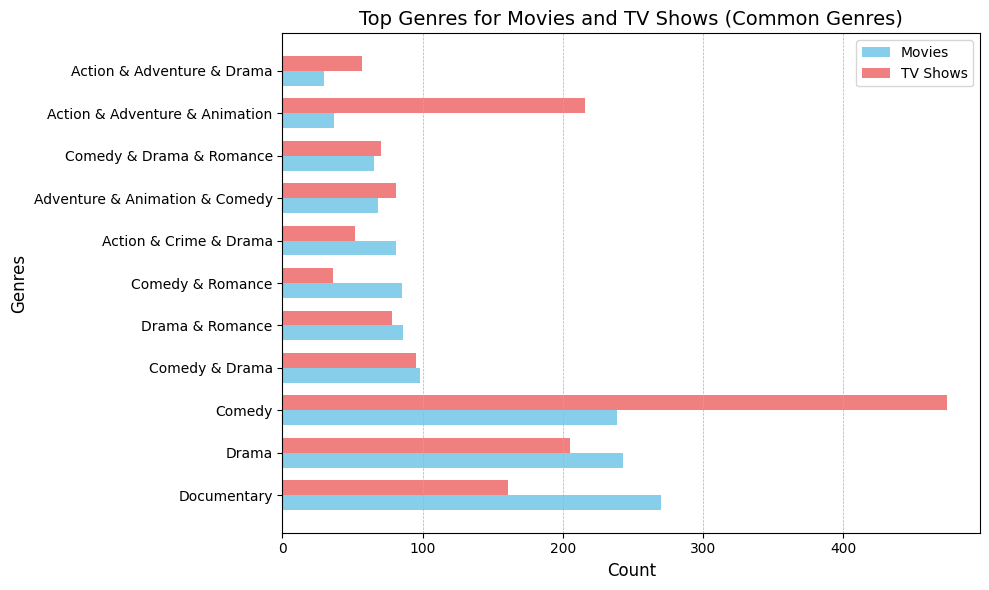

In [26]:
# Trying to display the values of the type column in a beautiful way
df['genres'] = df['genres'].str.replace(',', ' & ')

# Filtering data for movies and TV shows separately
df_genres_movie = df[df['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame'])]
df_genres_tvshows = df[df['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries', 'tvShort'])]

# Grouping the genres and counting the number of movies and TV shows for each genre
movies_genre = df_genres_movie.groupby('genres')['imdb_id'].count()
tvshows_genre = df_genres_tvshows.groupby('genres')['imdb_id'].count()

# Data
movies_genre = movies_genre.sort_values(ascending=False)[:20]  # Sorting movies genre data in descending order and selecting top 20
tvshows_genre = tvshows_genre.sort_values(ascending=False)[:20]  # Sorting TV shows genre data in descending order and selecting top 20

# Get genres present in both movies and TV shows
common_genres = movies_genre.index.intersection(tvshows_genre.index)

# Filter the genres for movies and TV shows
movies_genre_common = movies_genre.loc[common_genres]
tvshows_genre_common = tvshows_genre.loc[common_genres]

# Create positions for the tick labels
x = np.arange(len(common_genres))  # Generate an array of x-values using np.arange

# Plotting the bar chart
width = 0.35  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes

# Plotting movies genre
ax.barh(x, movies_genre_common, height=width, label='Movies', color='skyblue')
# Plotting TV shows genre on top of movies genre
ax.barh(x + width, tvshows_genre_common, height=width, label='TV Shows', color='lightcoral')

# Adding labels and title
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Genres', fontsize=12)
ax.set_title('Top Genres for Movies and TV Shows (Common Genres)', fontsize=14)

# Customizing tick labels
ax.set_yticks(x + width/2)  # Adjust the position of y-ticks
ax.set_yticklabels(common_genres, fontsize=10)

# Adding grid lines
ax.grid(axis='x', linestyle='--', linewidth=0.5)

# Adding legend
ax.legend(fontsize=10)

# Adjusting layout
plt.tight_layout()

# Display the chart
plt.show()


#### what we can coclude from the bar chart above is :
1. The genres differ between movies and TV shows, with each having its own predominant genres.
2. The bar chart primarily showcases Drama, Comedy, and Documentary genres as the most prevalent.

---------------------------------------------------------------------------------------------------------

### last columns to be analysed is : rating + number of votes

##### We Filter our dataframe first woth removing empty values  and then , we aggregate the data


In [27]:
# Filter and aggregate the data

# Filter out rows where the 'rating' column is 'No rate'
df.rating = df.rating[df.rating != 'No rate']

# Filter out rows where the 'numVotes' column is 'No rate'
df.numVotes = df.numVotes[df.numVotes != 'No rate']

# Filter out rows where the 'startYear' column is 'Unknown'
df.startYear = df.startYear[df.startYear != 'Unknown']

# Group the filtered data by 'startYear' and calculate the mean of 'rating' and the sum of 'numVotes'
rate_per_year = df.groupby('startYear').agg({'rating':'mean','numVotes':'sum'})

# Select just the last 15 years until 2021
rate_per_year = rate_per_year.iloc[:-1].tail(15)

##### PLOOOOOT THE DAAATAAAA :)

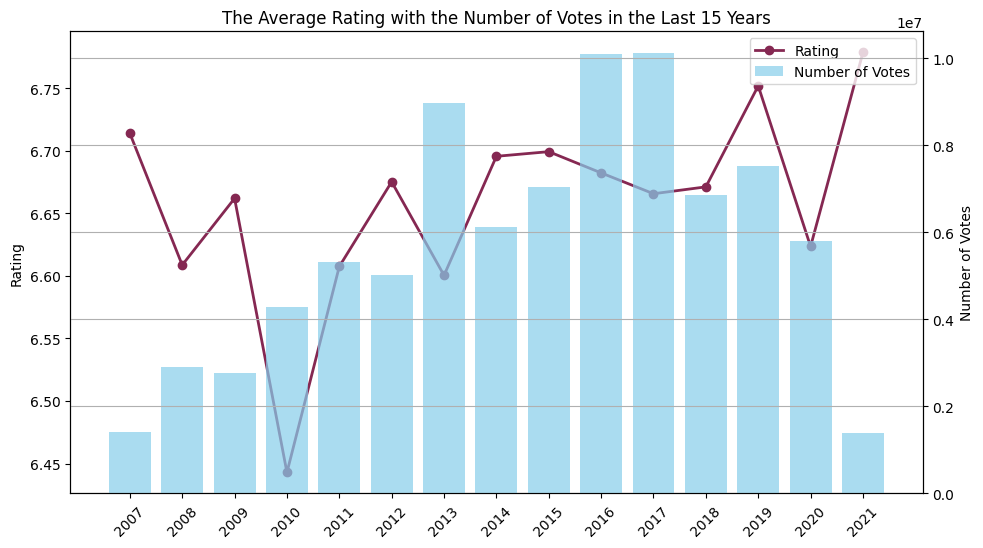

In [28]:
# Create the figure object and plot the data
fig, ax1 = plt.subplots(figsize=(11, 6))

# Plot the 'rating' column as a line chart with label 'Rating'
ax1.plot(rate_per_year['rating'], label='Rating', color='#852852', marker='o', linestyle='-', linewidth=2)

# Set the y-axis label for the line chart
ax1.set_ylabel('Rating')

# Create a second y-axis for the bar chart
ax2 = ax1.twinx()

# Plot the 'numVotes' column as a bar chart with label 'Number of Votes'
ax2.bar(rate_per_year.index, rate_per_year['numVotes'], label='Number of Votes', color='skyblue', alpha=0.7)

# Set the y-axis label for the bar chart
ax2.set_ylabel('Number of Votes')

# Set x-axis tick labels to every other index from rate_per_year
ax1.set_xticks(rate_per_year.index)
ax1.set_xticklabels(rate_per_year.index.astype(int), rotation=45)

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper right')

# Add a title
plt.title("The Average Rating with the Number of Votes in the Last 15 Years")

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()


#### we can obviously remark that : 
#####  1. The average rating has remained consistently around 6 out of 10 over the past 15 years, regardless of fluctuations in the number of votes.


## Insights & Conclusion

some Insights that I Got when exploring this dataset : 

1. this dataset contains almost the same number of films and Series 
2. The United States ranks prominently among the leading countries in terms of exporting movies and TV series.
3. Netflix's has started making many films/TV shows in the last 10 years
4. Average minutes of films between : 90 & 100 .Average minutes of episodes in Tv Shows between : 40 & 60 .
5. The genres that dominate the most are Drama, Comedy, and Documentary.
6. The average rating has remained consistent at approximately 6 out of 10 over the last 15 years, despite fluctuations in the number of votes.